<a href="https://colab.research.google.com/github/AnujraajGSakthivel/Striped-Llamas/blob/main/Striped_Llamas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
import pyomo.environ as pyo
import pyomo.gdp as gdp
!apt install coinor-libipopt-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
coinor-libipopt-dev is already the newest version (3.11.9-2.1ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


Building Demand

Text(0.5, 1.0, 'Demand')

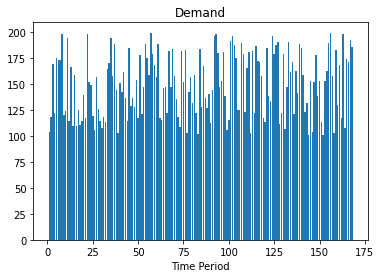

In [112]:
T = 168
T = np.array([t for t in range(0, T)])
d = np.array([100 + 100*np.random.uniform() for t in T])

fig, ax = plt.subplots(1,1)
ax.bar(T+1, d)
ax.set_xlabel('Time Period')
ax.set_title('Demand')

In [113]:
T

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

In [114]:
from google.colab import files
uploaded = files.upload()

Saving op.csv to op (1).csv


In [115]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['op.csv']))
NBD = df1['NBD'].values
NPVPcap = df1['NPVP'].values

In [116]:
NBD[0]

97824.37815333335

In [117]:
uploaded = files.upload()
df2 = pd.read_csv(io.BytesIO(uploaded['op2.csv']))

Saving op2.csv to op2 (1).csv


In [118]:
df2.head()

,Availability_Private,Availability_Shared,SOCmin_Private,SOCmin_Shared,Dpriv,Dshared
0,1,1,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0
2,1,1,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,0.0,0.0


In [119]:
av = pd.DataFrame(index=np.arange(475), columns=np.arange(168))

for i in range(0,239):
  av.iloc[i, :] = df2["Availability_Private"].values
for i in range(239,475):
  av.iloc[i, :] = df2["Availability_Shared"].values
av.iloc[0,0]

1

In [120]:
distrav = pd.DataFrame(index=np.arange(475), columns=np.arange(168))

for i in range(0,239):
  distrav.iloc[i, :] = df2["Dpriv"].values
for i in range(239,475):
  distrav.iloc[i, :] = df2["Dshared"].values
distrav

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,...,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,...,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,...,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,...,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,...,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.1,0,0,0,0,0,0,0,14.1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
socmin = pd.DataFrame(index=np.arange(475), columns=np.arange(168))

for i in range(0,239):
  socmin.iloc[i, :] = df2["SOCmin_Private"].values
for i in range(239,475):
  socmin.iloc[i, :] = df2["SOCmin_Shared"].values
socmin

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,...,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,...,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,...,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,...,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,...,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0,0,0,0,0.3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Sets

In [122]:
I =  20 #buildings

L =  21 #apartment per building

J = I * L #total number of apartments

R = J * 3 #total number of residents

K = 5 * I #Total number of charging stations

C = round(R * 0.377) #total number of EVs
numEV = C

I = np.array([i for i in range(0, I)])
L = np.array([l for l in range(0, L)])
J = np.array([j for j in range(0, J)])
R = np.array([r for r in range(0, R)])
K = np.array([k for k in range(0, K)])
C = np.array([c for c in range(0, C)])

Z = 100000
plimit = 10000
capc = 62000
numEV

475

In [123]:
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

In [127]:
def unit_commitment():
    m = pyo.ConcreteModel()


    #sets
    m.T = pyo.Set(initialize=T)
    m.K = pyo.Set(initialize=K)
    m.C = pyo.Set(initialize=C)
    m.I = pyo.Set(initialize=I)
    m.J = pyo.Set(initialize=J)

    #variables
    m.x = pyo.Var(m.T, bounds = (0, Z))
    m.y = pyo.Var(m.T, bounds = (0, Z))
    m.NPVP = pyo.Var(m.T, bounds = (0, Z))
    m.pck = pyo.Var(m.K, m.T, bounds = (0, plimit))
    m.pdck = pyo.Var(m.K, m.T, bounds = (0, plimit))
    m.pcc = pyo.Var(m.C, m.T, bounds = (0, plimit))
    m.pdcc = pyo.Var(m.C, m.T, bounds = (0, plimit))
    m.soc = pyo.Var(m.C, m.T, bounds = (0, 1))

    #binaryvariables
    m.nck = pyo.Var(m.K, m.T, domain=pyo.Binary)
    m.ndck = pyo.Var(m.K, m.T, domain=pyo.Binary)
    m.ncc = pyo.Var(m.C, m.T, domain=pyo.Binary)
    m.ndcc = pyo.Var(m.C, m.T, domain=pyo.Binary)
    
    # objectives
    m.obj1 = pyo.Objective(expr = abs(sum(m.x[t] - m.y[t] for t in m.T)), sense=pyo.minimize)
    #m.obj2 = pyo.Objective(expr = (m.x[t] for t in m.T), sense=pyo.minimize)
    #m.obj2 = pyo.Objective(expr = abs(sum(m.x[t] for t in m.T)), sense=pyo.minimize)
    
    # constraints

    # equalityconstraints
    m.cons1 = pyo.Constraint(m.T, rule=lambda m, t: m.y[t] == (sum(m.x[t] for t in T))/168)
    m.cons2 = pyo.Constraint(m.T, rule=lambda m, t: m.x[t] == (NBD[t] + m.NPVP[t] + sum(m.nck[k,t]*m.pck[k,t] for k in m.K) 
    - sum(m.ndck[k,t]*m.pdck[k,t] for k in K)))
    def constraint_3(m, C, T):
      if T==0:
        return m.soc[C,T] == m.soc[C,167]
      return m.soc[C,T] * capc == m.soc[C,T-1] * capc + av.iloc[C,T-1]*(m.ncc[C,T-1]*m.pcc[C,T-1]-m.ndcc[C,T-1]*m.pdcc[C,T-1])-distrav.iloc[C,T-1]*274.34
    m.cons3 = pyo.Constraint(m.C,m.T,rule=constraint_3)
    m.cons4 = pyo.Constraint(m.T, rule=lambda m, t:  sum(m.nck[k,t]*m.pck[k,t] for k in K) == sum(m.ncc[c,t]*m.pcc[c,t] for c in C) )
    m.cons4 = pyo.Constraint(m.T, rule=lambda m, t:  sum(m.ndck[k,t]*m.pdck[k,t] for k in K) == sum(m.ndcc[c,t]*m.pdcc[c,t] for c in C))

    # inequalityconstraints
    m.cons5 = pyo.Constraint(m.K, m.T, rule=lambda m, k, t: m.nck[k,t]+m.ndck[k,t] <= 1)
    m.cons6 = pyo.Constraint(m.K, m.T, rule=lambda m, k, t: m.pck[k,t] <= m.nck[k,t]*plimit)
    m.cons13 = pyo.Constraint(m.K, m.T, rule=lambda m, k, t: m.pdck[k,t] <= m.ndck[k,t]*plimit)
    m.cons7 = pyo.Constraint(m.C, m.T, rule=lambda m, c, t: m.ncc[c,t]+m.ndcc[c,t] <= 1)
    m.cons8 = pyo.Constraint(m.C, m.T, rule=lambda m, c, t: m.pcc[c,t] <= m.ncc[c,t]*plimit)
    m.cons9 = pyo.Constraint(m.C, m.T, rule=lambda m, c, t: m.pdcc[c,t] <= m.ndcc[c,t]*plimit)
    m.cons10 = pyo.Constraint(m.C, m.T, rule=lambda m, c, t: m.soc[c,t] >= socmin.iloc[c,t])
    m.cons12 = pyo.Constraint(m.T, rule=lambda m, t: m.NPVP[t] <= NPVPcap[t])
    def constraint_11(m, T):
      if NBD[T] > NPVPcap[T]:
        return NBD[T] - m.NPVP[T] ==  m.x[T] + sum(m.ndck[k,T]*m.pdck[k,T] for k in K)
      if NBD[T] == NPVPcap[T]:
        return NBD[T] == m.NPVP[T]
      return m.NPVP[T] - NBD[T] == sum(m.nck[k,T]*m.pck[k,T] for k in K)
    m.cons11 = pyo.Constraint(m.T,rule=constraint_11)


    return m
   
m = unit_commitment()
pyo.SolverFactory('bonmin', executable='/content/bonmin').solve(m).write()



    'pyomo.core.base.constraint.IndexedConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.IndexedConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


KeyboardInterrupt: ignored